In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


2024-12-04 18:01:49.994529: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 18:01:50.073622: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 18:01:50.141171: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733310110.188977   31271 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733310110.203882   31271 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 18:01:50.345245: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [34]:
!curl -L -o faktor-stunting.zip\
https://www.kaggle.com/api/v1/datasets/download/harnelia/faktor-stunting

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 45433  100 45433    0     0  14469      0  0:00:03  0:00:03 --:--:-- 22194


In [35]:
!unzip faktor-stunting.zip

Archive:  faktor-stunting.zip
  inflating: Stunting_Dataset.csv    


In [2]:
# Load the dataset
df = pd.read_csv('Stunting_Dataset.csv')
df

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes
...,...,...,...,...,...,...,...,...
9995,Male,15,3.0,49,9.0,63.0,No,Yes
9996,Female,12,2.8,48,7.7,63.0,No,No
9997,Male,16,2.8,49,7.7,49.0,No,No
9998,Male,14,2.8,49,10.0,69.0,No,Yes


In [3]:
df = df.drop(columns=['Breastfeeding'])

Gender          0
Age             0
Birth Weight    0
Birth Length    0
Body Weight     0
Body Length     0
Stunting        0
dtype: int64


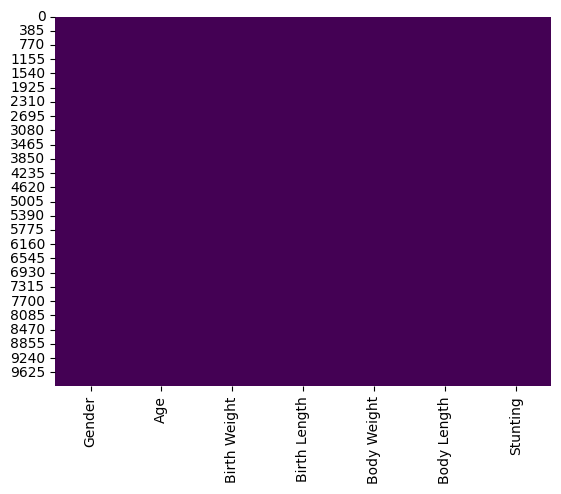

In [38]:
print(df.isnull().sum())  # jumlah missing values per kolom
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [4]:
# Cek data yang duplikat
duplikat = df[df.duplicated()]

# Menampilkan data duplikat
print(duplikat)

# Cek jumlah data duplikat
print(f"Jumlah data duplikat: {len(duplikat)}")


      Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
76      Male   13           2.9            49          9.0         69.0   
121     Male    6           2.3            50          6.4         68.3   
147     Male    6           2.3            50          6.4         68.3   
207     Male   15           2.9            49          9.0         69.0   
317     Male   13           2.3            50          6.4         68.3   
...      ...  ...           ...           ...          ...          ...   
9985    Male    7           2.3            50          6.4         68.3   
9989  Female    9           3.0            49          7.1         65.0   
9993    Male   12           2.3            49          9.0         69.0   
9995    Male   15           3.0            49          9.0         63.0   
9998    Male   14           2.8            49         10.0         69.0   

     Stunting  
76        Yes  
121        No  
147        No  
207       Yes  
317        No  
...

In [5]:
# Hapus data duplikat
df = df.drop_duplicates()
df

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Stunting
0,Male,17,3.0,49,10.0,72.2,No
1,Female,11,2.9,49,2.9,65.0,Yes
2,Male,16,2.9,49,8.5,72.2,Yes
3,Male,31,2.8,49,6.4,63.0,Yes
4,Male,15,3.1,49,10.5,49.0,Yes
...,...,...,...,...,...,...,...
9992,Male,11,2.8,48,10.5,73.5,No
9994,Male,15,2.8,49,2.9,71.0,Yes
9996,Female,12,2.8,48,7.7,63.0,No
9997,Male,16,2.8,49,7.7,49.0,No


In [6]:
# Cek data yang duplikat
duplikat = df[df.duplicated()]

# Menampilkan data duplikat
print(duplikat)

# Cek jumlah data duplikat
print(f"Jumlah data duplikat: {len(duplikat)}")

Empty DataFrame
Columns: [Gender, Age, Birth Weight, Birth Length, Body Weight, Body Length, Stunting]
Index: []
Jumlah data duplikat: 0


In [7]:
df = df.rename(columns={
    'Birth Weight': 'Birth_Weight',
    'Birth Length': 'Birth_Length',
    'Body Weight': 'Body_Weight',
    'Body Length': 'Body_Length'
})

In [8]:
# 1. BMI Bayi
df['BMI'] = df['Body_Weight'] / (df['Body_Length'] ** 2)

# 2. Perbedaan Berat dari saat Lahir hingga Sekarang
df['Weight_Diff'] = df['Body_Weight'] - df['Birth_Weight']

# 3. Perbedaan Panjang dari saat Lahir hingga Sekarang
df['Length_Diff'] = df['Body_Length'] - df['Birth_Length']

# Menampilkan data dengan fitur baru
print(df.head())

   Gender  Age  Birth_Weight  Birth_Length  Body_Weight  Body_Length Stunting  \
0    Male   17           3.0            49         10.0         72.2       No   
1  Female   11           2.9            49          2.9         65.0      Yes   
2    Male   16           2.9            49          8.5         72.2      Yes   
3    Male   31           2.8            49          6.4         63.0      Yes   
4    Male   15           3.1            49         10.5         49.0      Yes   

        BMI  Weight_Diff  Length_Diff  
0  0.001918          7.0         23.2  
1  0.000686          0.0         16.0  
2  0.001631          5.6         23.2  
3  0.001612          3.6         14.0  
4  0.004373          7.4          0.0  


In [9]:
print(df.shape)  # ukuran dataset
print(df.info()) # informasi tipe data
print(df.head()) # beberapa baris pertama

(7573, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 7573 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        7573 non-null   object 
 1   Age           7573 non-null   int64  
 2   Birth_Weight  7573 non-null   float64
 3   Birth_Length  7573 non-null   int64  
 4   Body_Weight   7573 non-null   float64
 5   Body_Length   7573 non-null   float64
 6   Stunting      7573 non-null   object 
 7   BMI           7573 non-null   float64
 8   Weight_Diff   7573 non-null   float64
 9   Length_Diff   7573 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 650.8+ KB
None
   Gender  Age  Birth_Weight  Birth_Length  Body_Weight  Body_Length Stunting  \
0    Male   17           3.0            49         10.0         72.2       No   
1  Female   11           2.9            49          2.9         65.0      Yes   
2    Male   16           2.9            49          8.5    

In [10]:
print(df.describe())  # statistik deskriptif

               Age  Birth_Weight  Birth_Length  Body_Weight  Body_Length  \
count  7573.000000   7573.000000   7573.000000  7573.000000  7573.000000   
mean     14.886967      2.762208     49.084643     7.630648    69.120269   
std       8.580291      0.297725      0.436202     1.762529     9.401527   
min       6.000000      2.000000     48.000000     2.900000    49.000000   
25%      10.000000      2.800000     49.000000     7.000000    65.000000   
50%      13.000000      2.800000     49.000000     7.700000    69.000000   
75%      16.000000      3.000000     49.000000     9.000000    72.200000   
max      48.000000      3.100000     50.000000    10.500000    92.700000   

               BMI  Weight_Diff  Length_Diff  
count  7573.000000  7573.000000  7573.000000  
mean      0.001694     4.868441    20.035627  
std       0.000658     1.780092     9.421906  
min       0.000337    -0.200000    -1.000000  
25%       0.001333     4.100000    16.000000  
50%       0.001631     4.900000  

In [11]:
# Initialize encoders and scaler
le = LabelEncoder()
scaler = MinMaxScaler()

# Convert categorical/boolean columns to numeric
df['Stunting'] = le.fit_transform(df['Stunting'])
df['Gender'] = le.fit_transform(df['Gender'])

# Define numeric features with the correct column names
numeric_features = ['Age', 'Birth_Weight', 'Birth_Length', 'Body_Weight', 'Body_Length', 'BMI', 'Weight_Diff', 'Length_Diff']

# Verify columns exist
print("\nAvailable columns after renaming:", df.columns.tolist())

# Scale numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df


Available columns after renaming: ['Gender', 'Age', 'Birth_Weight', 'Birth_Length', 'Body_Weight', 'Body_Length', 'Stunting', 'BMI', 'Weight_Diff', 'Length_Diff']


,Gender,Age,Birth_Weight,Birth_Length,Body_Weight,Body_Length,Stunting,BMI,Weight_Diff,Length_Diff
0,1,0.261905,0.909091,0.5,0.934211,0.530892,0,0.391720,0.827586,0.529540
1,0,0.119048,0.818182,0.5,0.000000,0.366133,1,0.086458,0.022989,0.371991
2,1,0.238095,0.818182,0.5,0.736842,0.530892,1,0.320419,0.666667,0.529540
3,1,0.595238,0.727273,0.5,0.460526,0.320366,1,0.315936,0.436782,0.328228
4,1,0.214286,1.000000,0.5,1.000000,0.000000,1,1.000000,0.873563,0.021882
...,...,...,...,...,...,...,...,...,...,...
9992,1,0.119048,0.727273,0.0,1.000000,0.560641,0,0.397988,0.908046,0.579869
9994,1,0.214286,0.727273,0.5,0.000000,0.503432,1,0.058927,0.034483,0.503282
9996,0,0.142857,0.727273,0.0,0.631579,0.320366,0,0.397096,0.586207,0.350109
9997,1,0.238095,0.727273,0.5,0.631579,0.000000,0,0.711034,0.586207,0.021882


In [12]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
label = "Stunting"

# Konversi dataframe pandas ke tf.data.Dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)


2024-11-27 19:51:25.971343: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
# # Model GBT
# model = tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.CLASSIFICATION,hyperparameter_template="benchmark_rank1")

# # Latih model
# model.fit(train_ds)

# # Create a Random Search tuner with 50 trials and automatic hp configuration.
# tuner = tfdf.tuner.RandomSearch(num_trials=50, use_predefined_hps=True)

# # Define and train the model.
# tuned_model = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
# tuned_model.fit(train_ds, verbose=2)

# Set hyperparameter
# Set hyperparameter dengan float pada density factor
model = tfdf.keras.GradientBoostedTreesModel(
    task=tfdf.keras.Task.CLASSIFICATION,
    split_axis="SPARSE_OBLIQUE",
    sparse_oblique_projection_density_factor=3.0,  # Ubah ke float
    sparse_oblique_normalization="NONE",
    sparse_oblique_weights="BINARY",
    categorical_algorithm="RANDOM",
    growing_strategy="LOCAL",
    max_depth=8,
    sampling_method="RANDOM",
    subsample=1.0,
    shrinkage=0.1,
    min_examples=5,
    use_hessian_gain=False,
    num_candidate_attributes_ratio=0.5
)

# Latih model
model.fit(train_ds)

# # Model GBT
# model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)

# # Latih model
# model.fit(train_ds)

# # Model GBT
# model = tfdf.keras.CartModel(task=tfdf.keras.Task.CLASSIFICATION)

# # Latih model
# model.fit(train_ds)



Use /tmp/tmpyxnurugy as temporary training directory
Reading training dataset...


2024-11-27 19:51:31.222055: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
2024-11-27 19:51:31.222089: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1850] "goss_beta" set but "sampling_method" not equal to "GOSS".
2024-11-27 19:51:31.222100: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1864] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:02.671566. Found 6058 examples.
Training model...


I0000 00:00:1732711893.913197   52086 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1732711893.913365   52086 kernel.cc:783] Collect training examples
I0000 00:00:1732711893.913373   52086 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1732711893.913647   52086 kernel.cc:401] Number of batches: 7
I0000 00:00:1732711893.913659   52086 kernel.cc:402] Number of examples: 6058
I0000 00:00:1732711893.913979   52086 kernel.cc:802] Training dataset:
Number of records: 6058
Number of columns: 10

Number of columns by type:
	NUMERICAL: 9 (90%)
	CATEGORICAL: 1 (10%)

Columns:

NUMERICAL: 9 (90%)
	0: "Age" NUMERICAL mean:0.211971 min:0 max

Model trained in 0:00:01.284569
Compiling model...


I0000 00:00:1732711895.171971   52489 early_stopping.cc:54] Early stop of the training because the validation loss does not decrease anymore. Best valid-loss: 0.848588
2024-11-27 19:51:35.172018: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1640] Create final snapshot of the model at iteration 43
2024-11-27 19:51:35.176690: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:277] Truncates the model to 14 tree(s) i.e. 14  iteration(s).
2024-11-27 19:51:35.177494: I external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:339] Final model num-trees:14 valid-loss:0.848588 valid-accuracy:0.822742
I0000 00:00:1732711895.178665   52489 kernel.cc:926] Export model in log directory: /tmp/tmpyxnurugy with prefix cd17986549e946dc
I0000 00:00:1732711895.179916   52489 kernel.cc:944] Save model in resources
I0000 00:00:1732711895.181457   52086 abstract_mode

Model compiled.


In [15]:
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.8317

loss: 0.0000
accuracy: 0.8317


In [51]:
model.make_inspector().evaluation()

Evaluation(num_examples=None, accuracy=0.8227424621582031, loss=0.8485884070396423, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

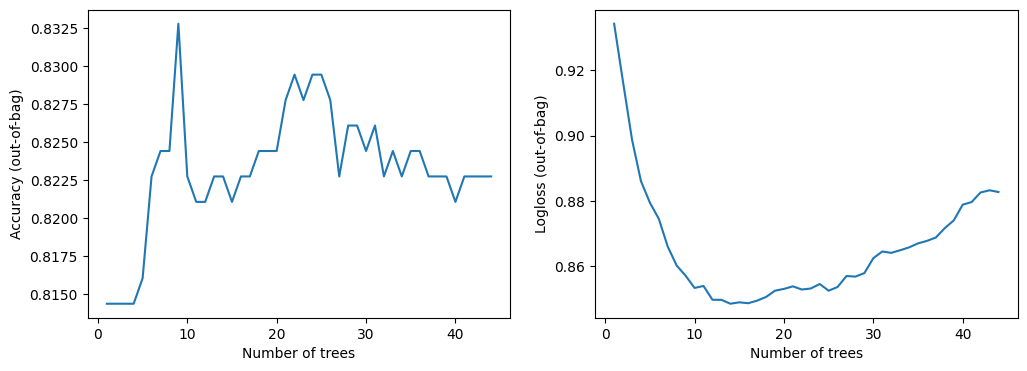

In [16]:
logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [17]:
# Evaluasi model menggunakan data uji
evaluation = model.evaluate(test_ds)
evaluation

2/2 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.8317


[0.0, 0.8316831588745117]

In [18]:
feature_importance = model.make_inspector().variable_importances()
print(feature_importance)

{'INV_MEAN_MIN_DEPTH': [("Age" (1; #0), 0.5566828755872373), ("Birth_Length" (1; #2), 0.28505281143484956), ("BMI" (1; #1), 0.2028592775950916), ("Birth_Weight" (1; #3), 0.15812029702648836), ("Body_Weight" (1; #5), 0.14155992381833024), ("Body_Length" (1; #4), 0.1413532954507746), ("Gender" (1; #6), 0.13508802410401965), ("Weight_Diff" (1; #8), 0.1329594843766315), ("Length_Diff" (1; #7), 0.13237322943525817)], 'NUM_AS_ROOT': [("Birth_Length" (1; #2), 7.0), ("Age" (1; #0), 5.0), ("BMI" (1; #1), 2.0)], 'SUM_SCORE': [("Age" (1; #0), 745.9948005933929), ("Birth_Length" (1; #2), 436.5629784934863), ("BMI" (1; #1), 265.2125661721202), ("Birth_Weight" (1; #3), 102.68979310541181), ("Body_Length" (1; #4), 63.7414520518214), ("Body_Weight" (1; #5), 56.377911277348176), ("Gender" (1; #6), 10.002423363621347), ("Length_Diff" (1; #7), 8.894417932722718), ("Weight_Diff" (1; #8), 7.948553164373152)], 'NUM_NODES': [("Age" (1; #0), 593.0), ("BMI" (1; #1), 214.0), ("Birth_Length" (1; #2), 115.0), ("B

In [55]:
# Generate predictions
predictions = model.predict(test_ds)

# Hitung jumlah prediksi yang nilainya di bawah 0.5
below_threshold_count = np.sum(predictions < 0.5)

print(f"Jumlah prediksi di bawah 0.5: {below_threshold_count}")


2/2 [==============================] - 0s 4ms/step
Jumlah prediksi di bawah 0.5: 99


In [19]:
model.save("model")

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [20]:
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/assets/ (stored 0%)
  adding: model/assets/cd17986549e946dcdone (stored 0%)
  adding: model/assets/cd17986549e946dcdata_spec.pb (deflated 34%)
  adding: model/assets/cd17986549e946dcgradient_boosted_trees_header.pb (deflated 74%)
  adding: model/assets/cd17986549e946dcnodes-00000-of-00001 (deflated 57%)
  adding: model/assets/cd17986549e946dcheader.pb (deflated 28%)
  adding: model/fingerprint.pb (stored 0%)
  adding: model/saved_model.pb (deflated 85%)
  adding: model/keras_metadata.pb (deflated 82%)
  adding: model/variables/ (stored 0%)
  adding: model/variables/variables.index (deflated 46%)
  adding: model/variables/variables.data-00000-of-00001 (deflated 59%)


In [2]:
# Mengonversi model SavedModel ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('model')

# Tell the converter to use the TensorFlow Decision Forests converter.
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
# Allow custom ops
converter.allow_custom_ops = True

# Rest of your conversion code
tflite_model = converter.convert()

# Menyimpan model TFLite ke file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

2024-12-04 18:02:02.871430: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2024-12-04 18:02:02.974013: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1206] Loading model from path model/assets/ with prefix cd17986549e946dc
I0000 00:00:1733310122.980337   31383 decision_forest.cc:761] Model loaded with 14 root(s), 2222 node(s), and 9 input feature(s).
I0000 00:00:1733310122.983487   31383 abstract_model.cc:1404] Engine "GradientBoostedTreesGeneric" built
2024-12-04 18:02:02.983508: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine
2024-12-04 18:02:03.065425: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1206] Loading model from path model/assets/ with prefix cd17986549e946dc
I0000 00:00:1733310123.070750   31381 decision_forest.cc:761] Model loaded with 14 root(s), 2222 node(s), and 9 input feature(s)

In [59]:
#contoh prediksi


In [ ]:
# nilai minimum dan maksimum dari data training
min_age = 0  # nilai min untuk kolom Age
max_age = 1  # nilai max untuk kolom Age
min_birth_weight = 0  # nilai min untuk kolom Birth_Weight
max_birth_weight = 1  # nilai max untuk kolom Birth_Weight
min_birth_length = 0  # nilai min untuk kolom Birth_Length
max_birth_length = 1  # nilai max untuk kolom Birth_Length
min_body_weight = 0  # nilai min untuk kolom Body_Weight
max_body_weight = 1  # nilai max untuk kolom Body_Weight
min_body_length = 0  # nilai min untuk kolom Body_Length
max_body_length = 1  # nilai max untuk kolom Body_Length


# Misalnya kita punya data scaler dari proses training, yang bisa berupa nilai min dan max tiap kolom
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

# Data baru
data_baru = {
    "Gender": 0,  # Male
    "Age": normalize(12, min_age, max_age),  # Normalisasi dengan nilai age range dari training
    "Birth_Weight": normalize(4, min_birth_weight, max_birth_weight),
    "Birth_Length": normalize(50, min_birth_length, max_birth_length),
    "Body_Weight": normalize(8, min_body_weight, max_body_weight),
    "Body_Length": normalize(90, min_body_length, max_body_length)
}

# Menghitung BMI
data_baru["BMI"] = data_baru["Body_Weight"] / ((data_baru["Body_Length"]/100) ** 2)

# Menghitung Weight_Diff dan Length_Diff
data_baru["Weight_Diff"] = data_baru["Body_Weight"] - data_baru["Birth_Weight"]
data_baru["Length_Diff"] = data_baru["Body_Length"] - data_baru["Birth_Length"]

# Membuat DataFrame
df = pd.DataFrame([data_baru])

df.head()

# Mengonversi DataFrame menjadi tf.data.Dataset
dataset = tfdf.keras.pd_dataframe_to_tf_dataset(df, task=tfdf.keras.Task.CLASSIFICATION)

# Melakukan prediksi menggunakan model
prediction = model.predict(dataset)

print(prediction)

# Ambil hasil prediksi, misalnya jika lebih dari 0.5 kita kategorikan sebagai tidak stunting (1)
stunting_prediction = int(prediction[0] > 0.7)  # Jika output lebih dari 0.5, kita kategorikan sebagai tidak stunting (1)
print("Prediksi Stunting:", "stunting" if stunting_prediction == 1 else "tidak stunting")



1/1 [==============================] - 0s 31ms/step
[[0.63127446]]
Prediksi Stunting: tidak stunting


/tmp/ipykernel_52086/1166523407.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stunting_prediction = int(prediction[0] > 0.7)  # Jika output lebih dari 0.5, kita kategorikan sebagai tidak stunting (1)
